## Imports and load data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from os.path import exists, dirname
import os, sys
import numpy as np
import seaborn as sns
import json
import yaml
import pickle
import scipy.stats as stats
from sklearn.metrics import r2_score
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/Users/ymdt/src/dreem_nap/'
sys.path.append(path)
from dreem_nap.manipulator import Manipulator
from dreem_nap.study import Study, util

# Config
path_to_data= '/Users/ymdt/src/data/Lauren'
path_to_studies= '/Users/ymdt/src/data/Lauren/studies.csv'
min_cov_bases= 1000
mpl.rcParams['figure.dpi'] = 100 # the highest the resolution, the slowest the plotting
#mpl.use('agg')

studies = Study.load_studies(path_to_studies)
lau = Study.from_dict(studies['3UTR_v_5UTR'].__dict__)
lau.load_df_from_local_files(path_to_data= path_to_data, min_cov_bases = min_cov_bases, filter_by='study')
lau.get_df().head()
lau._df.to_csv('lau.csv')
df = pd.read_csv('lau.csv')
df.head()

100%|██████████| 628/628 [00:00<00:00, 22553.30construct filtered/s, sample:472]


628 constructs found across all samples for study 3UTR_v_5UTR.


,Unnamed: 0,samp,construct,sequence,structure,data_type,num_reads,num_aligned,num_of_mutations,mut_bases,...,skips_short_read,skips_too_many_muts,mod_bases_A,mod_bases_C,mod_bases_G,mod_bases_T,cluster,mut_rates,worst_cov_bases,min_cov_bases
0,0,470,3114-O-flank_1=hp7-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCGC...,......(((........)))((((((.((....))))))))...((...,DMS,2028,2017,"[466, 590, 423, 196, 82, 20, 5, 11, 5, 2, 0, 0...",[ 0. 0. 0. 0. 0. 0. 0. 0. 1. ...,...,0,8,[ 0. 0. 0. 0. 0. 0. 0. 0. 1. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0,[0. 0. 0. 0. 0...,1792.0,0
1,1,470,3482-O-flank_1=lp11-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCTC...,......(((........)))((((((.((....))))))))........,DMS,2934,2932,"[818, 851, 559, 219, 74, 26, 5, 2, 1, 0, 0, 0,...",[ 0. 0. 0. 0. 0. 1. 0. 0. 0. ...,...,0,0,[ 0. 0. 0. 0. 0. 1. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0,[0. 0. 0. 0. 0...,2127.0,0
2,2,470,3091-CC-flank_1=hp5-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCGC...,......(((........)))((((((.((....))))))))...((...,DMS,2800,2797,"[722, 818, 574, 254, 86, 30, 8, 7, 2, 3, 0, 0,...",[ 0. 0. 0. 0. 0. 0. 0. 1. 0. ...,...,0,2,[ 0. 0. 0. 0. 0. 0. 0. 1. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0,[0. 0. 0. 0. 0...,2361.0,0
3,3,470,3124-O-flank_1=hp7-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCCG...,......(((........)))((((((.((....))))))))........,DMS,2790,2700,"[587, 670, 566, 341, 143, 56, 18, 7, 3, 0, 0, ...",[ 0. 0. 0. 0. 0. 0. 1. 0. 0. ...,...,0,0,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 1. 0. 0. ...,0,[0. 0. 0. 0. 0...,2328.0,0
4,4,470,3546-O-flank_1=bi4-rre-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCCG...,......(((........)))((((((.((....))))))))...((...,DMS,1471,1468,"[307, 423, 324, 182, 84, 22, 6, 5, 3, 0, 0, 0,...",[ 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,...,0,1,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. ...,0,[0. 0. 0. 0. 0...,1327.0,0


# Data quality analysis
- all construct vs all construct in a sample
- one construct across all samples
- all construct of a family vs all construct of a family
    - inside a sample
    - across samples
    


## Correlation metrics

In [3]:
LOAD_CORRELATION_CSV = True
from dreem_nap.util import RNAstructure

def custom_pearsonr(x, y):
    x , y = x[~np.isnan(x) & ~np.isnan(y)], y[~np.isnan(x) & ~np.isnan(y)]
    assert len(x) != 0, 'x is empty'
    return stats.pearsonr(x, y)[0]

def predict_deltaG(sequence, construct='construct'):
    rna = RNAstructure('/Users/ymdt/src/RNAstructure/exe')
    rna.fit(sequence=sequence, construct=construct)
    return rna.predict_construct_deltaG()[0]

corr_factory = {
    'pearson': lambda x, y: custom_pearsonr(x, y),
    'spearman': lambda x, y: stats.spearmanr(x, y)[0],
    'R2': lambda x, y: r2_score(x, y),
    'RMSD': lambda x, y: np.sqrt(np.mean((x - y)**2)),
}
lau._df['family'] = lau._df['construct'].apply(lambda x: x[x.index('=')+1:x.index('=')+x[x.index('='):].index('-')]) # TODO
lau._df['lah']= lau._df.apply(lambda x: x['mut_rates'][x['sequence'].index('CACAGTCGAAAGACTGTG'):x['sequence'].index('CACAGTCGAAAGACTGTG')+len('CACAGTCGAAAGACTGTG')],axis=1)
lau._df['ms2']= lau._df['mut_rates'].apply(lambda x: x[19:42])
lau._df['roi']= lau._df.apply(lambda x: x['mut_rates'][45:x['sequence'].index('CACAGTCGAAAGACTGTG')-2],axis=1)
lau._df['sequence_roi']= lau._df.apply(lambda x: x['sequence'][45:x['sequence'].index('CACAGTCGAAAGACTGTG')-2],axis=1)

if not LOAD_CORRELATION_CSV:
    df_corr = pd.DataFrame()
    i = 0
    for _, rx in tqdm(lau._df.iterrows(), colour='green', total=len(lau._df)):
        for _, ry in lau._df.iterrows():
            df_corr = pd.concat((df_corr,pd.DataFrame({
                'sample_x': rx['samp'],
                'sample_y': ry['samp'],
                'construct_x': rx['construct'],
                'construct_y': ry['construct'],
                'family_x': rx['family'],
                'family_y': ry['family'],
                'pearson_lah': corr_factory['pearson'](rx['lah'], ry['lah']),
                'pearson_ms2': corr_factory['pearson'](rx['ms2'], ry['ms2']),
                'spearman_lah': corr_factory['spearman'](rx['lah'], ry['lah']),
                'spearman_ms2': corr_factory['spearman'](rx['ms2'], ry['ms2']),
                'R2_lah': corr_factory['R2'](rx['lah'], ry['lah']),
                'R2_ms2': corr_factory['R2'](rx['ms2'], ry['ms2']),
                'RMSD_lah': corr_factory['RMSD'](rx['lah'], ry['lah']),
                'RMSD_ms2': corr_factory['RMSD'](rx['ms2'], ry['ms2']),
                'lah_x': rx['lah'],
                'lah_y': ry['lah'],
                'ms2_x': rx['ms2'],
                'ms2_y': ry['ms2'],
                'roi_x': rx['roi'],
                'roi_y': ry['roi']
            }, index = [i])) )
            i += 1
    df_corr.to_csv('df_corr.csv', index=False)
else:
    df = pd.read_csv('df_470_472.csv')

df_temp = pd.DataFrame()
for n, g in df.groupby('construct_x'):
    df_temp = pd.concat([df_temp, pd.DataFrame({'construct':n, 'pearson_lah_ms2_avg':np.mean(np.array(g['pearson_lah'].mean(), g['pearson_ms2'].mean()))}, index=[0])], ignore_index=True)
lau._df = pd.merge(df_temp, lau._df, left_on='construct', right_on='construct')


RMSD

![RMSD formula](rmsd.png) 

R2

![R2 formula](r2.png)

Spearman

![Spearman formula](spearman.png)        

Pearson

![Pearson formula](pearson.png)


## Replicates

### Utils

In [ ]:
path_control_replicates = '/Users/ymdt/src/dreem_nap/examples/Lauren/controls/replicates'
if not os.path.exists(path_control_replicates):
    os.mkdir(path_control_replicates)

def update_df_refraction(df_loc, df_refraction, col):
    x = np.linspace(0,1,1000)
    y = [np.mean(df_loc<i) for i in x]
    df_refraction = pd.concat((df_refraction, pd.DataFrame({
        'Correlation score':x,
        'Fraction of correlations score below x':y,
        'metric':col
    }))).reset_index(drop=True)
    return df_refraction

def refractor_df(df, per=None):
    df_refraction = pd.DataFrame()
    for col in [c for c in df.columns if sum([c.startswith(x) for x in list(corr_factory.keys())])>0]:
        if per == 'construct':
            for construct in tqdm(df.construct_x.unique(), colour='green', total=len(df.construct_x.unique()), postfix=col):
                df_loc_c = df[df.construct_x==construct][col]
                df_refraction = update_df_refraction(df_loc_c, df_refraction, col)
        elif per == 'sample':
            for sample in tqdm(df.sample_x.unique(), colour='green', total=len(df.sample_x.unique()), postfix=col):
                df_loc_c = df[df.sample_x==sample][col]
                df_refraction = update_df_refraction(df_loc_c, df_refraction, col)
        elif per == 'family':
            for family in tqdm(df.family_x.unique(), colour='green', total=len(df.family_x.unique()), postfix=col):
                df_loc_c = df[df.family_x==family][col]
                df_refraction = update_df_refraction(df_loc_c, df_refraction, col)
        else:
            df_loc_c = df[col]
            df_refraction = update_df_refraction(df_loc_c, df_refraction, col)
    return df_refraction

def make_plot(df,title):
    plt.figure(figsize=(15,7), dpi=600, facecolor='white')
    sns.lineplot(data=df, x='Correlation score', y='Fraction of correlations score below x', hue='metric')
    plt.grid()
    plt.title(title, fontsize=20)
    plt.xlabel('Correlation score', fontsize=15)
    plt.ylabel('Fraction of correlations score below x', fontsize=15)
    plt.legend(fontsize=15, loc='center left')
    plt.tight_layout()


def compare_barcodes(x,y):
    x, y = x.split('-'), y.split('-')
    for i in [2,3]:
        if x[i]!=y[i]:
            return False
    if x[1]==y[1]:
        return False
    if x[1]=='O' and y[1]=='CC':
        x,y = y,x
    if int(x[0]) != int(y[0])+1:
        return False
    return True

### Compare control regions (LAH + MS2) between all constructs of the sample for each sample

In [ ]:
df_loc = df[(df.construct_x!=df.construct_y)|(df.sample_x!=df.sample_y)] # Remove self correlation
df_loc = df_loc[df_loc.sample_x==df_loc.sample_y]                        # Remove inter sample correlation
df_refraction = refractor_df(df_loc, per='construct')
make_plot(df_refraction, title='Correlation score of control regions (LAH + MS2) between all constructs of the sample for each sample')
plt.savefig(f'{path_control_replicates}/all_constructs_inside_a_sample.png', dpi=600)

### Replicates across samples

In [ ]:
df_loc = df[(df.construct_x!=df.construct_y)|(df.sample_x!=df.sample_y)] # Remove self correlation
df_loc = df_loc[df_loc.sample_x!=df_loc.sample_y] # Keep only inter sample correlation
df_loc = df_loc[df_loc.construct_x==df_loc.construct_y] # Keep only intra-construct correlation
df_refraction = refractor_df(df_loc, per='construct')
make_plot(df_refraction, title='Correlation score of replicates (LAH + MS2) (N+{})'.format(len(df_loc.construct_x.unique())))
plt.savefig(f'{path_control_replicates}/replicates.png', dpi=600)

### All constructs vs all constructs, family-wise, inside samples


In [ ]:
# Cumulative plot
df_loc = df[df.family_x==df.family_y] # Keep only intra-family correlation
df_loc = df_loc[df_loc.sample_x==df_loc.sample_y] # Keep only intra-sample correlation
df_loc = df_loc[(df_loc.construct_x!=df_loc.construct_y)|(df_loc.sample_x!=df_loc.sample_y)] # Remove self correlation
df_refraction = refractor_df(df_loc, per='construct')
make_plot(df_refraction, title='Correlation score across all constructs inside a family inside a sample')
plt.savefig(f'{path_control_replicates}/inside_family_inside_samples.png', dpi=600)
    

### All constructs vs all constructs, family-wise, across samples


In [ ]:
# Cumulative plot
df_loc = df[df.family_x==df.family_y] # Keep only intra-family correlation
df_loc = df_loc[df_loc.sample_x!=df_loc.sample_y] # Keep only inter-sample correlation
df_loc = df_loc[(df_loc.construct_x!=df_loc.construct_y)|(df_loc.sample_x!=df_loc.sample_y)] # Remove self correlation
df_refraction = refractor_df(df_loc, per='construct')
make_plot(df_refraction, title='Correlation score across all constructs inside a family across samples')
plt.savefig(f'{path_control_replicates}/inside_family_across_sample.png', dpi=600)

### Barcode effect

In [ ]:
path_barcode_replicates = '/Users/ymdt/src/dreem_nap/examples/Lauren/controls/barcodes'

def compare_barcodes(x,y):
    x, y = x.split('-'), y.split('-')
    for i in [2,3]:
        if x[i]!=y[i]:
            return False
    if x[1]==y[1]:
        return False
    if int(x[0]) != int(y[0])+1:
        return False
    return True

df_bar = df[df.apply(lambda x: compare_barcodes(x['construct_x'], x['construct_y']), axis=1)]
df_bar = df_bar[df_bar.sample_x==df_bar.sample_y] # Keep only intra-sample correlation
df_refraction = refractor_df(df_bar, per='construct')
make_plot(df_refraction, title='Barcode replicates (N={})'.format(sum(df_bar['construct_x'].apply(lambda x: 1 if 'CC' in x else 0))))
plt.savefig(f'{path_barcode_replicates}/barcodes.png', dpi=600)
print(f"There's a total of {sum(df_bar['construct_x'].apply(lambda x: 1 if 'CC' in x else 0))} barcodes replicates.")

## Random bad replicates


In [ ]:
cols = ['pearson_lah', 'pearson_ms2']
acceptable_correlation = 0.8


### Biological replicates

In [ ]:
df_bio = df[(df.construct_x!=df.construct_y)|(df.sample_x!=df.sample_y)] # Remove self correlation
df_bio = df_bio[df_bio.sample_x!=df_bio.sample_y] # Keep only inter sample correlation
df_bio = df_bio[df_bio.construct_x==df_bio.construct_y] # Keep only intra-construct correlation

for col in cols:
    df_bio.sort_values(by=col, inplace=True, ascending=True)
    plt.figure(figsize=(20,20), dpi=600, facecolor='white')
    plt.title('Low-pearson scores replicates (LAH)', fontsize=20)
    for i in range(16):
        plt.subplot(4,4,i+1)
        row = df_bio.iloc[i]
        x, y = lau._df[(lau._df.construct==row.construct_x)&(lau._df.samp==row.sample_x)]['lah'].iloc[0], lau._df[(lau._df.construct==row.construct_y)&(lau._df.samp==row.sample_y)]['lah'].iloc[0]
        window = (-0.01,0.01+max(x.max(), y.max()))
        plt.plot(x, y,'.')
        plt.plot(window, window, 'k--')
        plt.title(f'{col}={row[col]:.2f}')
        plt.grid()
        plt.xlabel(f'{row.construct_x} ({row.sample_x})')
        plt.ylabel(f'{row.construct_y} ({row.sample_y})')
        plt.xlim(window)
        plt.ylim(window)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend(['Pearson={:.2f}'.format(corr_factory['pearson'](x,y)), 'y=x'])
    plt.tight_layout()
    plt.savefig(f'{path_control_replicates}/bio_replicates_low_{col}.png', dpi=600)

### Barcode replicates

In [ ]:

for col in cols:
    df_bar = df[df.apply(lambda x: compare_barcodes(x['construct_x'], x['construct_y']), axis=1)]
    df_bar = df_bar[df_bar.sample_x==df_bar.sample_y] # Keep only intra-sample correlation
    df_bar.sort_values(by=col, inplace=True, ascending=False)

    plt.figure(figsize=(20,20), dpi=600, facecolor='white')
    for i in range(16):
        plt.subplot(4,4,i+1)
        row = df_bar.iloc[i]
        x, y = lau._df[(lau._df.construct==row.construct_x)&(lau._df.samp==row.sample_x)]['lah'].iloc[0], lau._df[(lau._df.construct==row.construct_y)&(lau._df.samp==row.sample_y)]['lah'].iloc[0]
        plt.plot(x, y,'.')
        plt.plot(window, window, 'k--')
        plt.title(f'{col}={row[col]:.2f}')
        plt.grid()
        plt.xlabel(f'{row.construct_x} ({row.sample_x})')
        plt.ylabel(f'{row.construct_y} ({row.sample_y})')
        plt.xlim(window)
        plt.ylim(window)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend(['Pearson={:.2f}'.format(corr_factory['pearson'](x,y)), 'y=x'])
    plt.tight_layout()
    plt.savefig(f'{path_barcode_replicates}/barcode_low_{col}.png', dpi=600)


# Variable region analysis


In [77]:
print(f"Families are: {list(lau._df.family.unique())}")

Families are: ['hp7', 'hp5', 'bi4', 'hp8', 'hp13', 'bi6', 'cb7', 'cb4', 'lp7', 'cb8', 'bi7', 'cb9', 'lp9', 'lp5', 'hp3', 'lp2', 'bi12', 'bi10', 'bi9', 'bi3', 'lp11', 'bi11', 'lp8', 'hp4', 'lp10', 'hp1', 'cb3', 'lp12', 'cb1', 'lp1', 'bi2', 'cb11', 'hp12', 'cb2', 'hp14', 'lp3', 'cb10', 'bi5', 'hp11', 'cb5', 'lp4', 'cb6', 'hp2', 'hp6', 'lp6', 'bi8', 'bi1', 'hp9', 'hp10', 'cb12']


In [4]:
family = 'hp13'
samp = 470

# make directory for family
path_family = f'roi_analysis/{family}_{samp}/'
os.makedirs(path_family, exist_ok=True)

def pad_roi(x, pad=0):
    if pad==0:
        return x
    return np.concatenate((np.full(pad, np.nan), x, np.full(pad, np.nan)))

def generate_duo_family_df(family, samp):
    df_family_temp = lau._df[lau._df.family==family]
    df_family_temp = df_family_temp[df_family_temp.samp==samp]
    df_family = pd.DataFrame()
    longest_roi = max(df_family_temp.roi.apply(len))
    for _, row in tqdm(df_family_temp.iterrows(), total=len(df_family_temp)):
        for _, row2 in df_family_temp.iterrows():
            df_family = pd.concat([df_family, 
                pd.DataFrame(
                    {'construct_x': [row.construct], 
                    'construct_y': [row2.construct], 
                    'sample_x': [row.samp], 
                    'sample_y': [row2.samp],
                    'pearson_lah': [corr_factory['pearson'](row.lah, row2.lah)],
                    'pearson_ms2': [corr_factory['pearson'](row.ms2, row2.ms2)],
                    'roi_padded_x': [pad_roi(row.roi, pad=(longest_roi-len(row.roi))//2)],
                    'roi_padded_y': [pad_roi(row2.roi, pad=(longest_roi-len(row2.roi))//2)],
                    })])
    df_family['pearson_roi'] = df_family.apply(lambda x: corr_factory['pearson'](x['roi_padded_x'], x['roi_padded_y']) 
                                    if len(x['roi_padded_x'][~np.isnan(x['roi_padded_x'])]) >=len(x['roi_padded_y'][~np.isnan(x['roi_padded_y'])])
                                    else np.nan,axis=1)
    df_family.reset_index(inplace=True, drop=True)
    return df_family

def generate_single_family_df(family, samp):
    df_family = lau._df[lau._df.family==family].copy()
    df_family = df_family[df_family.samp==samp]
    longest_roi = max(df_family.roi.apply(len))
    df_family['roi_padded'] = df_family.roi.apply(lambda x: pad_roi(x, pad=(longest_roi-len(x))//2))
    df_family['deltaG_roi']= df_family['sequence_roi'].apply(lambda x: predict_deltaG(x))

    df_family.reset_index(drop=True, inplace=True)
    return df_family

def plot_heatmap(df, hp, family):        
    plt.figure(dpi=200, facecolor='white')
    sns.heatmap(df.pivot(index='construct_x', columns='construct_y', values='pearson_'+hp), cmap='viridis')
    plt.title(f'Pearson correlation between {hp} hairpins in family {family} (samp={samp})')
    plt.tight_layout()
    plt.savefig(f'{path_family}heatmap_{hp}_{family}.png', dpi=600)


## Construct quality indicator

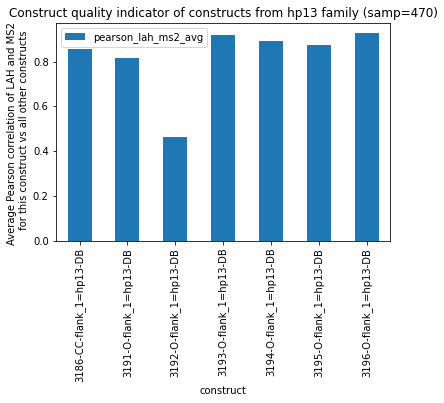

In [14]:
generate_single_family_df(family, samp).plot.bar(x='construct', 
                                                 y='pearson_lah_ms2_avg', 
                                                 title=f'Construct quality indicator of constructs from {family} family (samp={samp})',
                                                 ylabel='Average Pearson correlation of LAH and MS2 \n for this construct vs all other constructs')
plt.savefig(f'{path_family}construct_quality_{family}.png', dpi=600)

                       construct family  samp  pearson_lah_ms2_avg  \
2          3044-O-flank_1=hp1-DB    hp1   470             0.910271   
6          3046-O-flank_1=hp1-DB    hp1   470             0.902395   
8          3047-O-flank_1=hp1-DB    hp1   470             0.873962   
10         3050-O-flank_1=hp1-DB    hp1   470             0.263360   
12         3052-O-flank_1=hp1-DB    hp1   470             0.910713   
..                           ...    ...   ...                  ...   
672  3662-O-flank_1=bi12-kshv-DB   bi12   470             0.902018   
674  3664-O-flank_1=bi12-kshv-DB   bi12   470             0.922568   
676  3665-O-flank_1=bi12-kshv-DB   bi12   470             0.929072   
678  3666-O-flank_1=bi12-kshv-DB   bi12   470             0.907648   
680  3670-O-flank_1=bi12-kshv-DB   bi12   470             0.908672   

            sequence_roi  ROI length  
2    GATATTCGAAAGAATATCT          19  
6      ATATTCGAAAGAATATC          17  
8        TATTCGAAAGAATAT          15  
10 

<AxesSubplot:xlabel='ROI length', ylabel='family'>

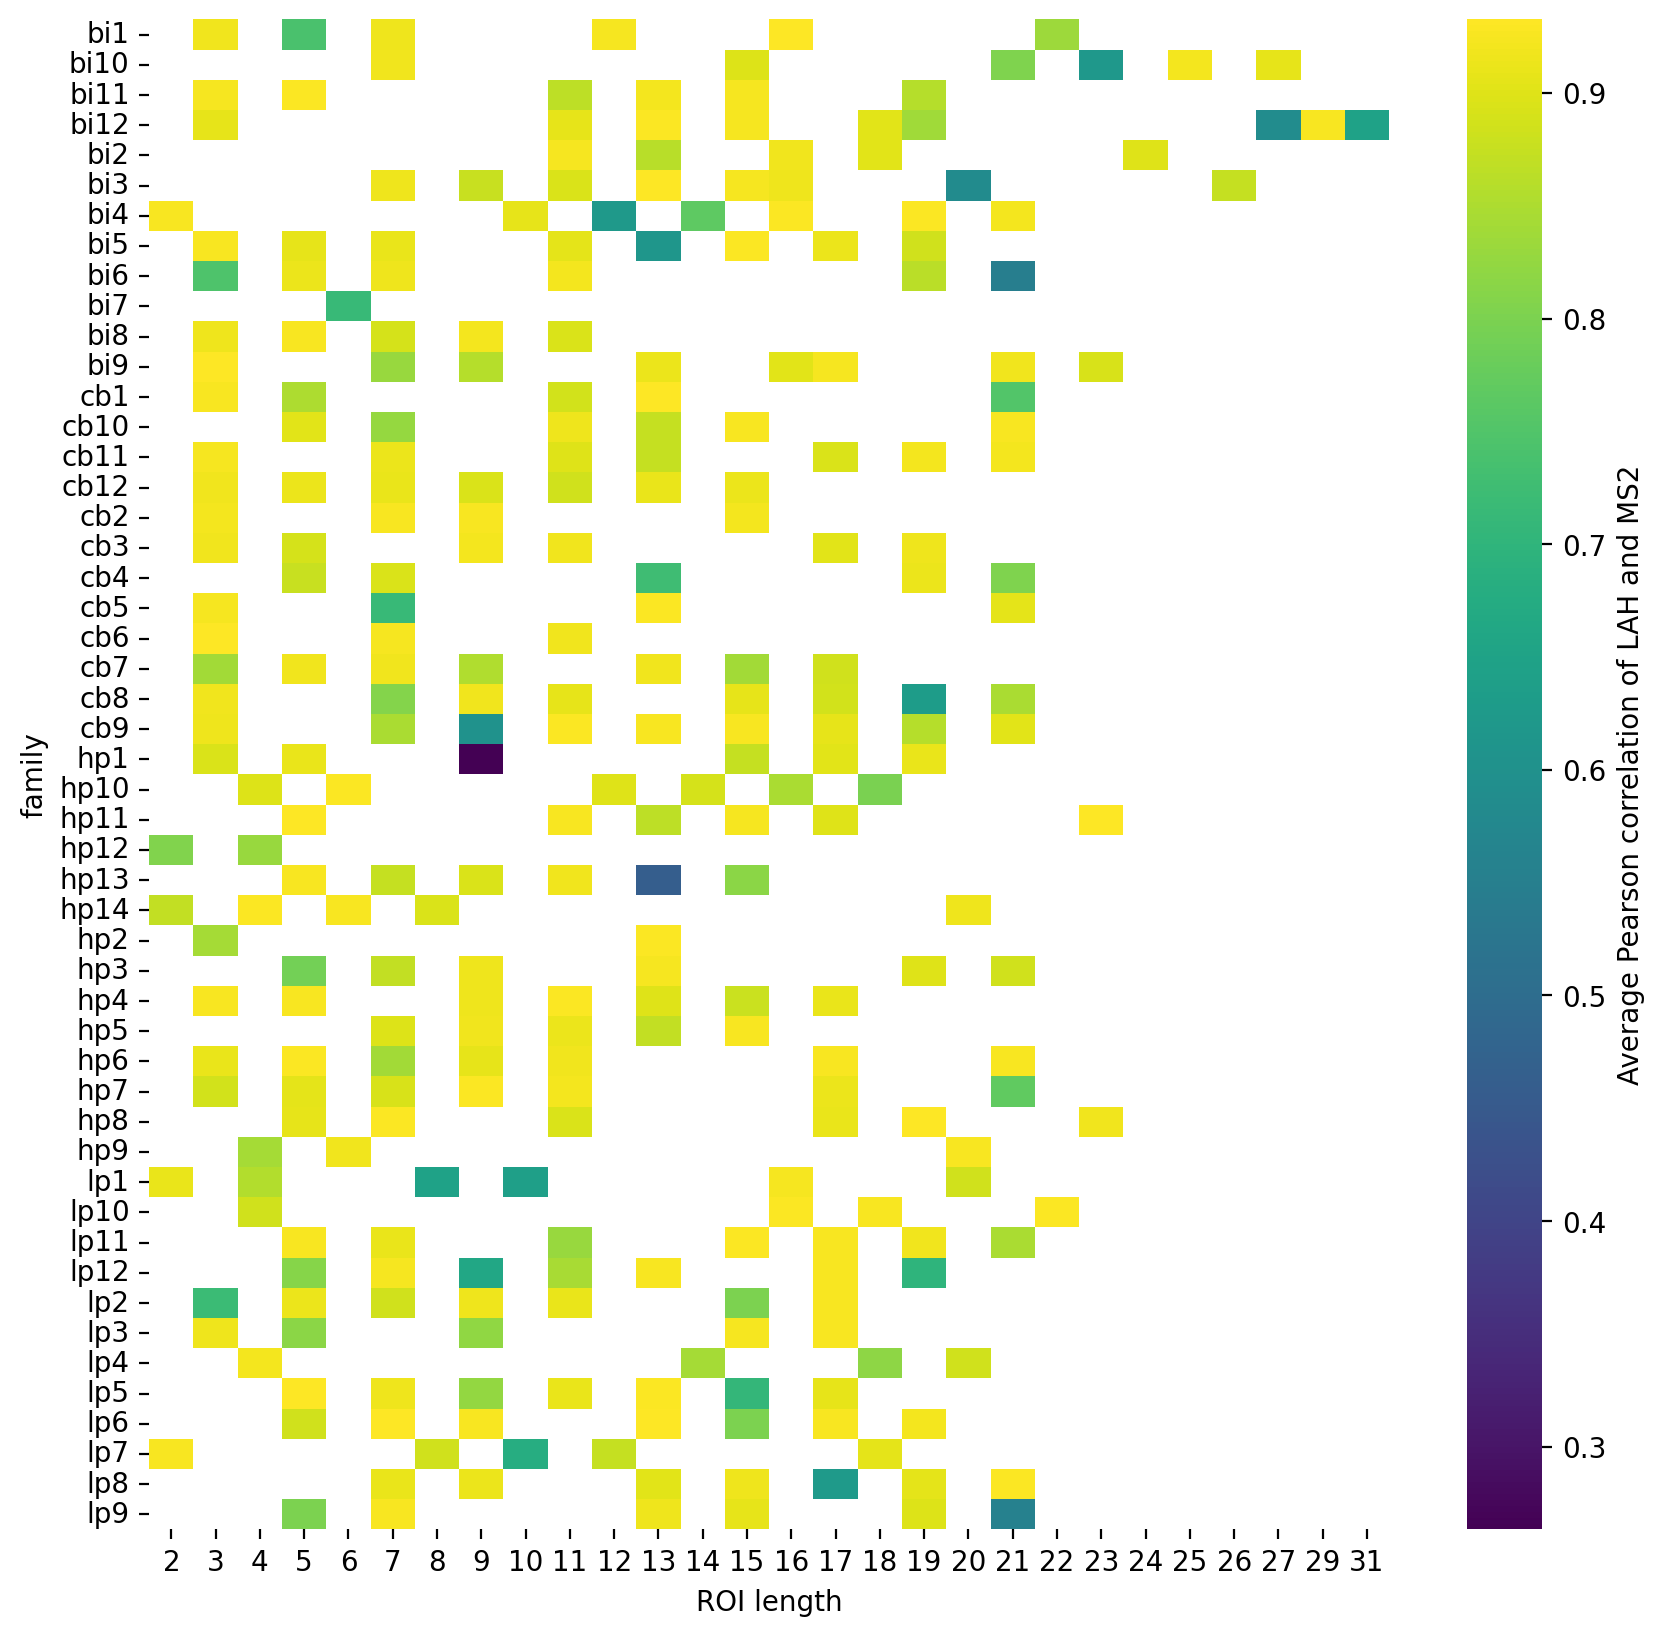

In [42]:
df_loc = lau._df[['construct', 'family', 'samp','pearson_lah_ms2_avg', 'sequence_roi']].copy()
df_loc = df_loc[df_loc.samp==samp]
for family in df_loc.family.unique():
    df_loc.loc[df_loc.family==family, 'ROI length'] =  df_loc.loc[df_loc.family==family, 'sequence_roi'].apply(lambda x: len(x))

# only keep 'CC' constructs
df_loc = df_loc[df_loc.construct.str.contains('O')]
df_loc['ROI length'] = df_loc['ROI length'].astype(int)
df_loc.to_csv(f'{path_family}construct_quality_{family}.csv', index=False)
print(df_loc)
df_loc = df_loc.pivot(index='family', columns='ROI length', values='pearson_lah_ms2_avg')
plt.figure(dpi=200, facecolor='white', figsize=(10,10))
sns.heatmap(df_loc, cmap='viridis', cbar_kws={'label': 'Average Pearson correlation of LAH and MS2'})

## Pearson heatmaps

### Pearson for LAH hairpin
![LAH](rnastructure/lah.png)

100%|██████████| 7/7 [00:00<00:00, 91.71it/s]


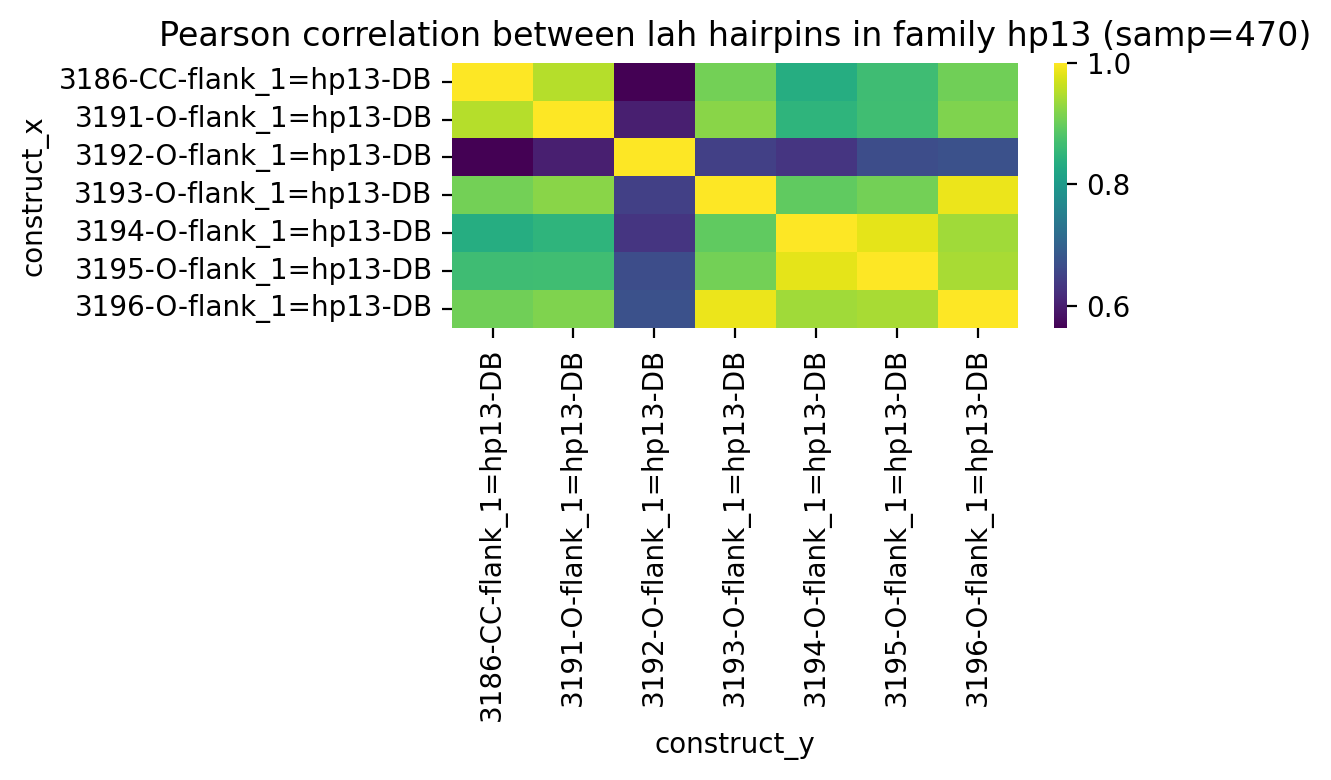

In [132]:
df_duo = generate_duo_family_df(family, samp)
plot_heatmap(df_duo, 'lah', family)

### Pearson for MS2 hairpin

![LAH](rnastructure/ms2.png)

100%|██████████| 7/7 [00:00<00:00, 93.16it/s]


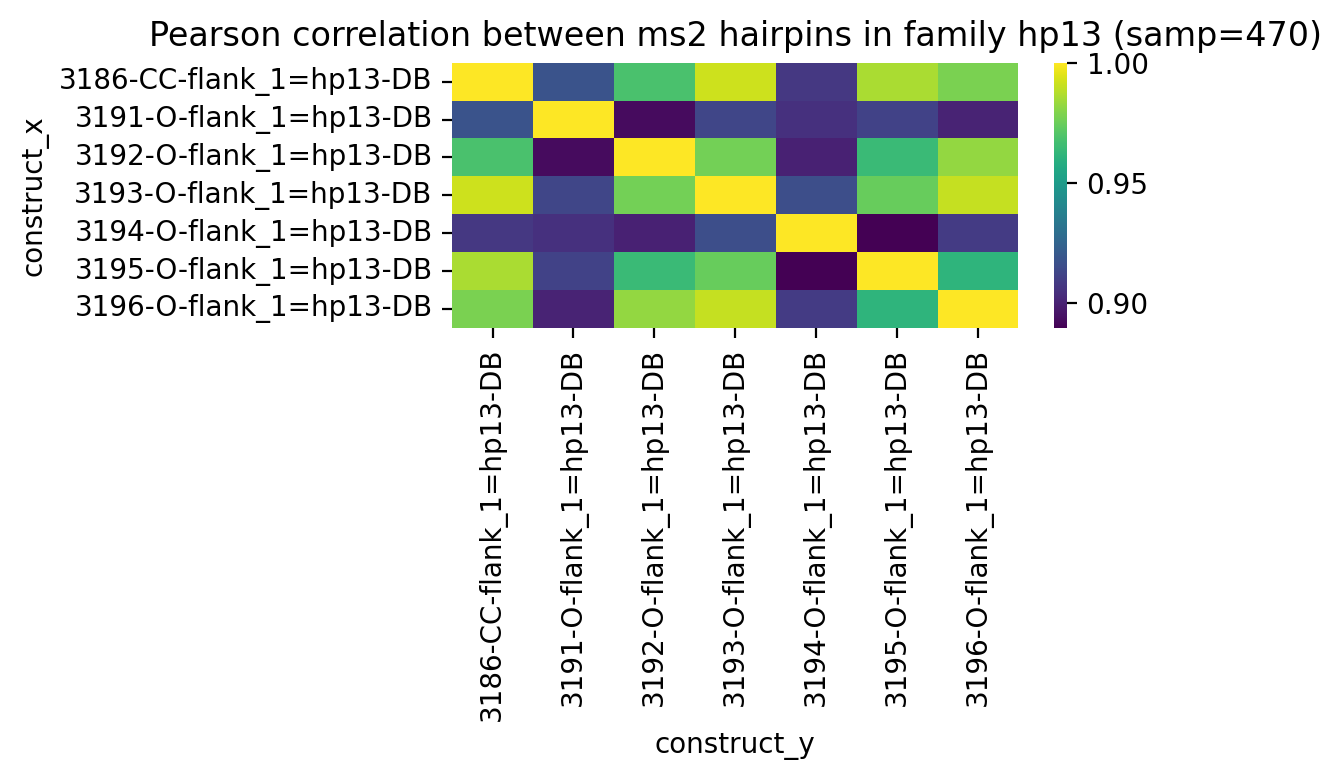

In [133]:
df_duo = generate_duo_family_df(family, samp)
plot_heatmap(df_duo, 'ms2', family)

### Pearson for ROI hairpin

100%|██████████| 7/7 [00:00<00:00, 90.51it/s]


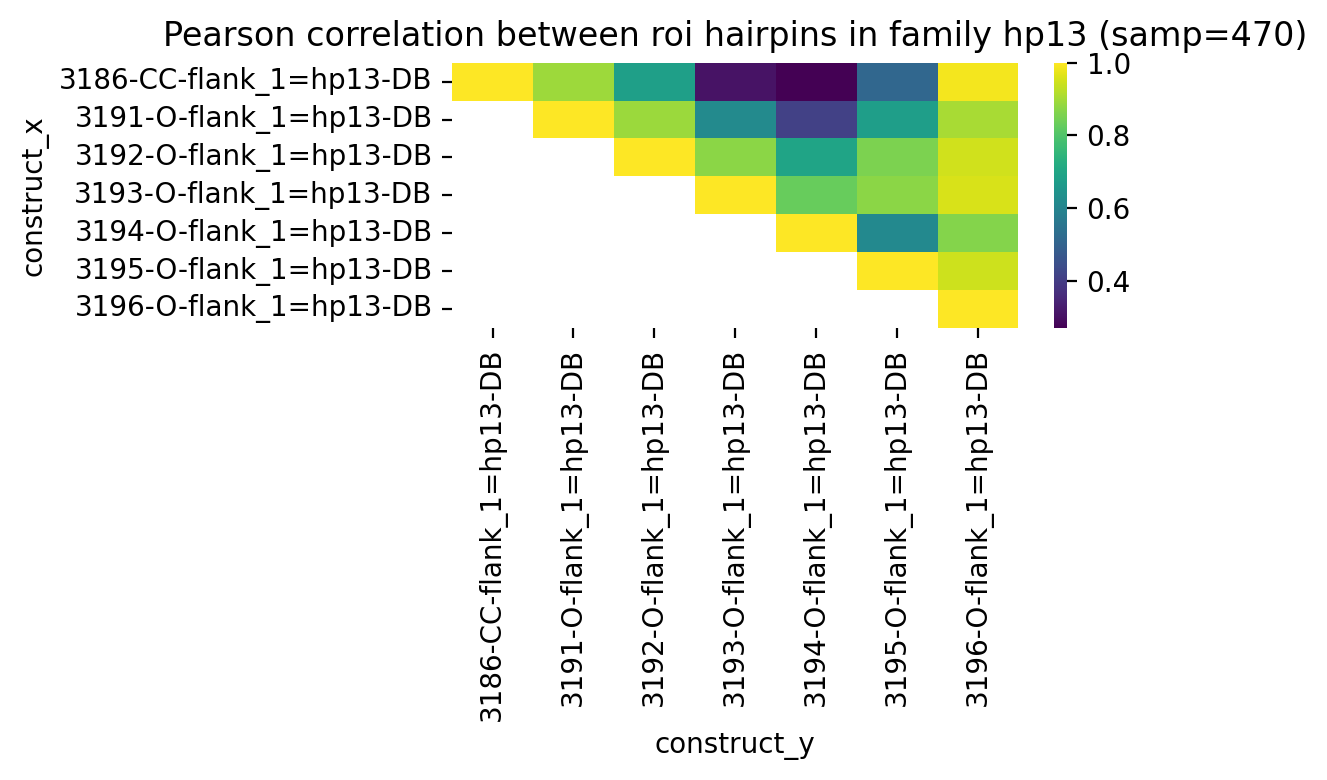

In [134]:
df_duo = generate_duo_family_df(family, samp)
plot_heatmap(df_duo, 'roi', family)

## Line plots deltaG vs mut rate per-residue

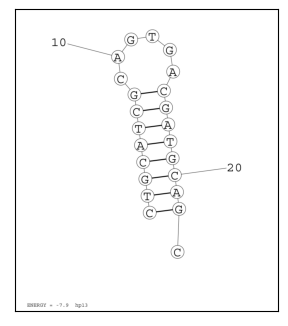

In [135]:
import plotly.express as px

df_single = generate_single_family_df(family, samp)

df_loc = pd.DataFrame()
Y = np.zeros((len(df_single), max(df_single.roi.apply(len))))
x = []
c = []
s = []
for i, row in df_single.iterrows():
    Y[i] = row['roi_padded']
    x.append(0 if row['deltaG_roi'] == 'void' else float(row['deltaG_roi']))
    c.append(row['construct'])
    s.append(row['sequence_roi'])

longest_sequence = max(s, key=len)

df_loc = pd.DataFrame(
    {'deltaG':x,
    'construct':c,
    'sequence':s,
    **{f"({a},{i})":Y[:,i] for a, i in zip(longest_sequence, range(Y.shape[1])) if a in ['A', 'C']}})

df_loc.sort_values('deltaG', inplace=True)
df_loc.set_index('construct', inplace=True)
fig = px.line(df_loc, x='deltaG', y= [c for c in df_loc.columns if ('A' in c or 'C' in c)] , markers=True, title=f'Family {family} (samp={samp})').update_layout(yaxis_title='Mutation rate', xaxis_title='ΔG (kcal/mol)')
df_loc.to_csv(f'{path_family}df_{family}.csv')
fig.write_html(f'{path_family}deltaG_vs_mutrate_{family}.html')
fig.show()

rna = util.RNAstructure('/Users/ymdt/src/RNAstructure/exe/')
rna.fit(longest_sequence, family)
rna.draw(f'{path_family}structure_{family}.png')

fig = plt.imshow(mpimg.imread(f'{path_family}structure_{family}.png'))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

### Pearson index for MS2

In [ ]:
plot_heatmap(df_family, 'roi', family)

## Clustering (obsolete?)
### Hyperparameters

In [ ]:
metric = 'spearman' # can be 'euclidean', 'correlation', 'spearman'
base_type=['A','C']
linkage = 'complete' # can be 'single', 'complete', 'average', 'weighted', 'centroid', 'median'

show = {
    'sequence_picture': True,
    'hierarchical_dendrogram': True,
    'mut_rates_heatmap': True,
    'distance_matrix_heatmap': True
}

### Utils

In [ ]:
def make_clustering_analysis(lau, metric, index, index_name, base_type, linkage, show, **kwargs):
    path = util.make_path(f'../data/figs/date/Lauren/clustering/')
    prefix = f'{lau.samples}_{index_name}_{metric}_{linkage}'
    if show['hierarchical_dendrogram']:
        out = lau.plot.cluster_dendrogram(samp=lau.samples, index=index, metric=metric, base_type = base_type, linkage=linkage, figsize=(10,70), dpi=300, title=f'Hierarchical clustering of the {index_name} hairpin', **kwargs)    
        out.fig.savefig(path+prefix+'_dendrogram.png')
    
    if show['distance_matrix_heatmap']:
        out = lau.plot.cluster_distance_matrix_heatmap(samp=lau.samples, index=index, metric=metric, base_type = base_type, linkage=linkage, figsize=(65,50), dpi=300, **kwargs)
        out.fig.savefig(path+prefix+'_dist_matrix.png')

    if show['mut_rates_heatmap']:
        out = lau.plot.cluster_mut_rates_heatmap(samp=lau.samples, index=index, metric=metric, base_type = base_type, linkage=linkage, figsize=(10,80), dpi=300, **kwargs)
        out.fig.savefig(path+prefix+'_mut_rates.png')

    with open(path+prefix+'_labels.txt', 'w') as f:
        for item in out.labels:
            f.write(item+'\n')
        f.close()


### Replicates 

In [ ]:
# TODO

### Flanks

In [ ]:
# TODO

### MS2
- show picture
- hierarchical clustering dendrogram
- construct vs sequence heatmap using clustering order
- construct vs construct heatmap using clustering order

In [ ]:
ms2_idx = list(range(19,42))
make_clustering_analysis(lau, metric, ms2_idx, 'MS2', base_type, linkage, show, p=10000)

### LAH
- show picture
- hierarchical clustering dendrogram
- construct vs sequence heatmap using clustering order
- construct vs construct heatmap using clustering order

In [ ]:
lah_idx = 'CACAGTCGAAAGACTGTG'
make_clustering_analysis(lau, metric, lah_idx, 'LAH', base_type,linkage, show, p=10000)

### MS2 + LAH
- show picture
- hierarchical clustering dendrogram
- construct vs sequence heatmap using clustering order
- construct vs construct heatmap using clustering order

In [ ]:
# TODO

### Plot generation routine

In [ ]:
ms2_idx = list(range(19,42))
lah_idx = 'CACAGTCGAAAGACTGTG'

for idx, idx_name in zip([ms2_idx, lah_idx], ['MS2', 'LAH']):
    print(idx_name)
    for linkage in ['single', 'complete', 'average']:
        print(linkage)
        for metric in ['euclidean', 'correlation', 'spearman']:
            make_clustering_analysis(lau, metric, idx, idx_name, base_type, linkage, show)
            

In [142]:
a=np.random.randn(12288,150) 

# a.shape=(12288,150)a.shape = (12288, 150)a.shape=(12288,150)

b=np.random.randn(150,45) 

# b.shape=(150,45)b.shape = (150, 45)b.shape=(150,45)

c=np.dot(a,b)
c.shape

(12288, 45)